Step 1: Preparing for Your Proposal

1. Selected the **Sportstats** dataset. Mainly selected because the dataset is small and hence it will be easier to move data and wont be an issue when loaded into ram compared to the other datasets.

In [ ]:
!pip install pandasql

In [4]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")

### noc_regions dataset

In [18]:
pysqldf('''
SELECT * 
from noc_regions
limit 5
''')

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None


In [16]:
pysqldf('''
SELECT count(*) as count_,
count(distinct region) as count_region_,
count(distinct noc) as count_noc_,
count(distinct notes) as count_notes_
from noc_regions
''')

,count_,count_region_,count_noc_,count_notes_
0,230,206,230,21


In [14]:
pysqldf('''
SELECT *
from noc_regions as nr
WHERE nr.region IS NULL
OR nr.NOC IS NULL
''')

,NOC,region,notes
0,ROT,None,Refugee Olympic Team
1,TUV,None,Tuvalu
2,UNK,None,Unknown


In [17]:
pysqldf('''
SELECT count(*)-count(noc) as null_noc, 
count(*)-count(region) as null_region,
count(*)-count(notes) as null_notes
from noc_regions
''')

,null_noc,null_region,null_notes
0,0,3,209


In [78]:
pysqldf('''
SELECT
region, 
count(*) as noc_count
from noc_regions
where region IS NOT NULL
GROUP BY region
HAVING noc_count>1
ORDER BY noc_count DESC
''')

,region,noc_count
0,Germany,4
1,Czech Republic,3
2,Malaysia,3
3,Russia,3
4,Serbia,3
5,Yemen,3
6,Australia,2
7,Canada,2
8,China,2
9,Greece,2


* In noc_regions dataset there are total of 230 rows, with 230 unique NOC code, 206 unique regions, and 21 unique notes.
* There are 3/230 null values in region, 209/230 null values in notes, 0/230 null values in NOC.
* So we can ignore the notes column because they dont provide that much of an information.
* 14 regions have more than 1 noc. Germany has the maximum with 4 noc followed by Czeck, Malaysia, Serbia
* The multiple nocs might be because of changes in the country, like for example germany was east germany and west germany before and so on.

### athlete_events dataset

In [23]:
pysqldf('''
SELECT * 
from athlete_events
limit 5
''')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [26]:
pysqldf('''
SELECT count(*) as count_
from athlete_events
''')

,count_
0,271116


In [37]:
pysqldf('''
SELECT 
count(*)-count(name) as null_name,
count(*)-count(sex) as null_sex,
count(*)-count(age) as null_age,
count(*)-count(height) as null_height,
count(*)-count(weight) as null_weight,
count(*)-count(team) as null_team,
count(*)-count(noc) as null_noc,
count(*)-count(games) as null_games,
count(*)-count(year) as null_year,
count(*)-count(season) as null_season,
count(*)-count(city) as null_city,
count(*)-count(sport) as null_sport,
count(*)-count(event) as null_event,
count(*)-count(medal) as null_medal
from athlete_events
''')

,null_name,null_sex,null_age,null_height,null_weight,null_team,null_noc,null_games,null_year,null_season,null_city,null_sport,null_event,null_medal
0,0,0,9474,60171,62875,0,0,0,0,0,0,0,0,231333


In [50]:
pysqldf('''
SELECT 
games,
count(distinct event) as count_event 
from athlete_events
group by games
order by count_event desc 
limit 5
''')

,Games,count_event
0,2016 Summer,306
1,2008 Summer,302
2,2012 Summer,302
3,2004 Summer,301
4,2000 Summer,300


In [45]:
pysqldf('''
SELECT 
count(distinct name) as total_name, 
count(distinct sex) as total_sex ,
count(distinct noc) as total_noc ,
count(distinct games) as total_games, 
count(distinct event) as total_event 
from athlete_events
''')

,total_name,total_sex,total_noc,total_games,total_event
0,134732,2,230,51,765


In [48]:
pysqldf('''
SELECT distinct games
from athlete_events
where games like '%Summer'
order by games
''')

,Games
0,1896 Summer
1,1900 Summer
2,1904 Summer
3,1906 Summer
4,1908 Summer
5,1912 Summer
6,1920 Summer
7,1924 Summer
8,1928 Summer
9,1932 Summer


In [49]:
pysqldf('''
SELECT distinct games
from athlete_events
where games like '%Winter'
order by games
''')

,Games
0,1924 Winter
1,1928 Winter
2,1932 Winter
3,1936 Winter
4,1948 Winter
5,1952 Winter
6,1956 Winter
7,1960 Winter
8,1964 Winter
9,1968 Winter


* Total of about 271k olympic participants.
* 9k nulls in age, 60k height, 62k weights.
* Age height and weight not considered for further analysis.
* Team, year, season, city, sport is also not required as these might be containing redundant data.
* Important columns are **name, sex, noc, games, event, medal**
* Consists of last 29 summer olympics and last 22 winter olympics.

In [60]:
pysqldf('''
SELECT 
games,
event,
noc,
count(medal) as medal_count
from athlete_events
where medal like 'Gold'
group by games, event
order by medal_count desc
''')

,Games,Event,NOC,medal_count
0,1908 Summer,Gymnastics Men's Team All-Around,SWE,38
1,1920 Summer,Gymnastics Men's Team All-Around,ITA,27
2,1912 Summer,"Gymnastics Men's Team All-Around, Free System",NOR,24
3,1912 Summer,"Gymnastics Men's Team All-Around, Swedish System",SWE,24
4,1920 Summer,"Gymnastics Men's Team All-Around, Swedish System",SWE,24
...,...,...,...,...
6141,2016 Summer,"Wrestling Women's Flyweight, Freestyle",JPN,1
6142,2016 Summer,"Wrestling Women's Heavyweight, Freestyle",CAN,1
6143,2016 Summer,"Wrestling Women's Light-Heavyweight, Freestyle",JPN,1
6144,2016 Summer,"Wrestling Women's Lightweight, Freestyle",JPN,1


* There are cases when a team got as many medals as 38 like for gymnastics.

SummerOlympics - Event count across time


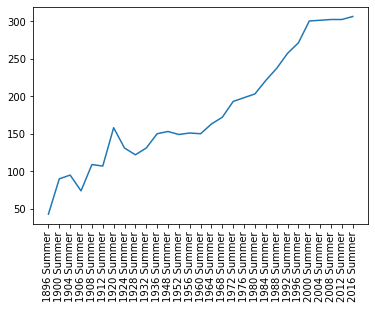

WinterOlympics - Event count across time


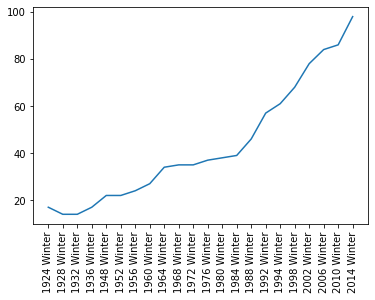

In [89]:
import matplotlib.pyplot as plt
grouped = athlete_events.groupby('Season')
for a,b in grouped:
    print(a+'Olympics - Event count across time')
    grouped2 = b.groupby('Games').nunique()['Event'].reset_index().sort_values(by='Games',ascending=True)
    plt.plot(grouped2['Games'], grouped2['Event'])
    plt.xticks(rotation=90)
    plt.show()

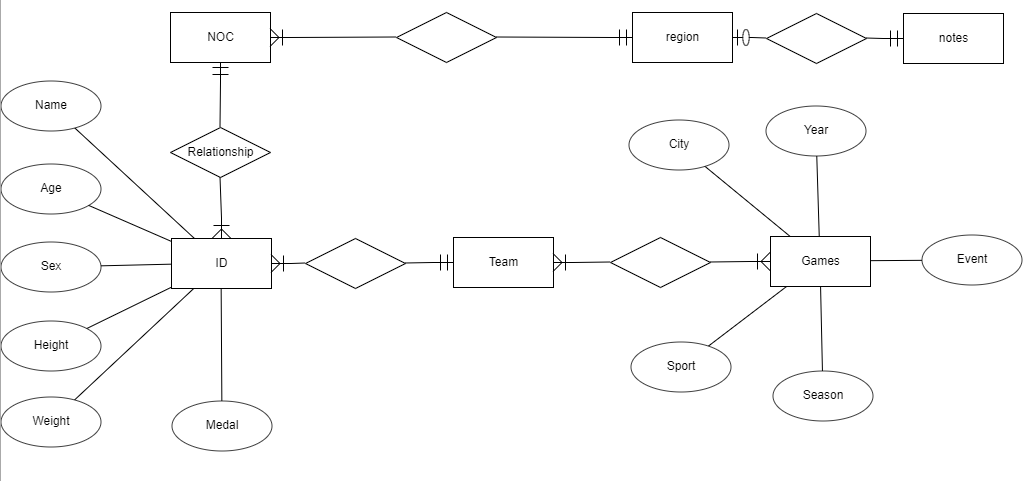


# Project Proposal
In this project, I would analyze about the woman participation throughout the olympics. 

Questions
Q1: Did the woman participation increase throughout the years?
Q2: Is there a difference between ratio in Winter and Summer olympics?
Q3: Is the woman participation ratio same across all countries?

Hypotheses
H1: Yes
H2: Both will be same
H3: No, the woman participation would be less in strict orthodox countries while it would be greater in free countries.

Approach
A1: plot graphs suggesting the percent increase in woman events.
A2: Corelation coefficient of woman events between winter and summer olympics.
A3: check current ratios of participation of different countries.